In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [3]:
model_path = "/content/drive/MyDrive/models/Cotton/cotton.h5"

In [4]:
model = tf.keras.models.load_model(model_path)

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)      

# Testing the model

In [6]:
labels = {"diseased cotton leaf": 0, "diseased cotton plant": 1, "fresh cotton leaf": 2, "fresh cotton plant": 3}
keys = list(labels.keys())

In [7]:
def classify_img(path, model=model):
  img= Image.open(path)
  img
  img= img.resize((224, 224)) 
  img= np.array(img)
  img = img/ 255.0
  plt.imshow(img)
  img = img.reshape((1, 224, 224, 3))
  pred = model.predict(img)
  pred = np.argmax(pred)
  pred = keys[pred]
  plt.title(pred)
  plt.show()
  return pred

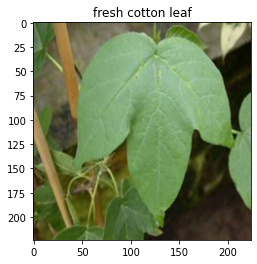

<Figure size 432x288 with 0 Axes>

In [8]:
#Fresh Leaf
path= "/content/fresh.jpg"
pred = classify_img(path)
plt.savefig("fresh.png")

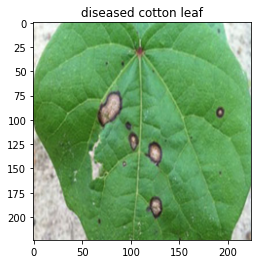

<Figure size 432x288 with 0 Axes>

In [9]:
# Diseased Leaf
path= "/content/diseases_leaf.jpg"
pred= classify_img(path)
plt.savefig("diseased.png")